### Mean and Standard Deviation

__Mean__ is the average value of a signal:

$$\mu = {1\over N} \sum_{i=0}^{N-1}x_i $$

The expression $|x_i - \mu|$ describes how far the $i^{th}$ sample _deviates_ from the mean. The __average deviation__ of a signal is found by summing the deviations of all the individual samples, and then diving by the number of samples $N$.

The __standard deviation__ is similar to the __average deviation__, except the averaging is done with power instead of amplitude.

$$\sigma^2 = {1\over{N-1}} \sum_{i=0}^{N-1}(x_i - \mu)^2 $$

In the alternative notation:

$$\sigma = \sqrt{{1\over{N-1}} \sum_{i=0}^{N-1}(x_i - \mu)^2} $$

The term $\sigma^2$ is given the name __variance__.

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
rcParams['figure.figsize'] = 14, 5

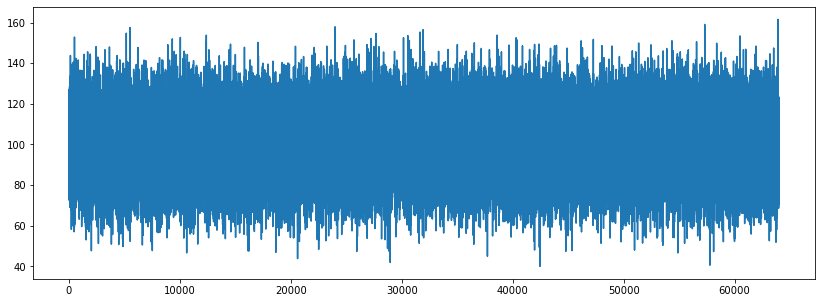

In [116]:
N = 64000;
mu = 100;
sigma = 15;
x = np.random.normal(mu, sigma, N-1);
plt.plot(x);

In [112]:
mean = 0;

for i in range(N-1):
    mean = mean + x[i];
    
mean = mean/N;
print('mean: ', mean);

mean:  100.09169630042243


In [113]:
variance = 0;

for i in range(N-1):
    variance = variance + (x[i] - mean)**2;
variance = variance/(N-1);

sd = np.sqrt(variance);
error = sd/np.sqrt(N);
print('standard deviation:', sd);
print('typical error: ', error)

standard deviation: 14.96752661730852
typical error:  0.05916434381236291


### Histogram, Pmf and Pdf

A __histogram__ is an approximate representation of the distribution of numerical data.

The sum of all of the values in the histogram ($H_i$) is equal to the number of points in the signal ($N$).

$$N=\sum_{i=0}^{M-1}H_i$$ 

$M$ is the number of points in the histogram

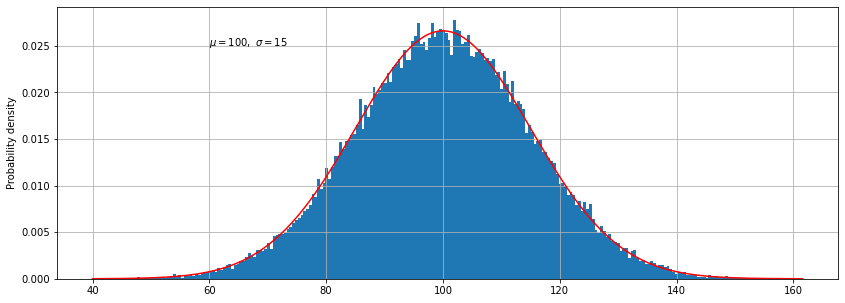

In [119]:
count, bins, _ = plt.hist(x, 256, density=True);
plt.ylabel('Probability density')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.grid(True);

pdf = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (bins - mu) ** 2 / (2 * sigma**2))
plt.plot(bins, pdf, color='r');
plt.show();

Calculation of the mean from the histogram:

$$\mu = {1\over N} \sum_{i=0}^{M-1}i H_i$$
Calculation of the standard deviation from the histogram:

$$\sigma^2 = {1\over{N-1}} \sum_{i=0}^{M-1}(i - \mu)^2 H_i $$

The _histogram_ is what is formed from an acquired signal. The corresponding curve for the underlying process is called the __probability mass function (pmf)__. The histogram and pmf can only be used with discrete data. A similar concept applies to continuous signals. The __probability density function (pdf)__, or __probability distribution function__, is to continuous signals what the pmf is to discrete signals. 

Pdf for __normal distribution__ (or __Gauss distribution__):

$$ f(x) = {1\over{\sigma\sqrt{2\pi}}} e^{-{1\over2}({{x-\mu} \over \sigma})^2} $$

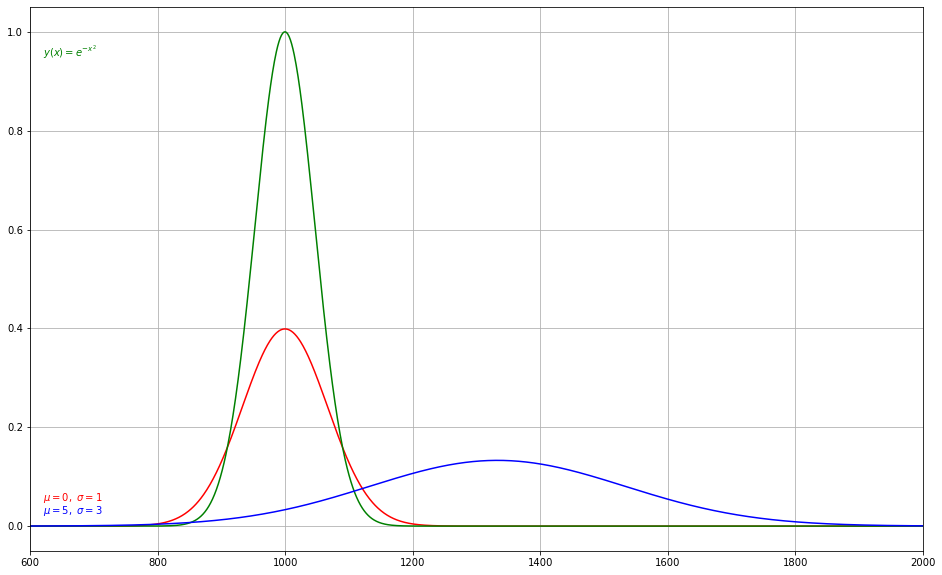

In [212]:
rcParams['figure.figsize'] = 16, 10

# x = np.arange(-15, 15, 0.01);
num = 2000
x = np.linspace(-15, 15, num)
expo = np.exp(- x **2)

sigma = 1;
mean = 0;
pdf = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mean) ** 2 / (2 * sigma**2))

sigma = 3;
mean = 5;
pdf2 = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mean) ** 2 / (2 * sigma**2))

offset = 600;
posx = offset + 20;
fig, ax = plt.subplots()
ax.text(posx, .05, r'$\mu=0,\ \sigma=1$', color='r')
ax.plot(pdf, color='r');
ax.text(posx, .95, r'$y(x) = e^{-x^2}$', color='g')
ax.plot(expo, color='g');
ax.text(posx, .025, r'$\mu=5,\ \sigma=3$', color='b')
ax.plot(pdf2, color='b');
ax.grid(True);
ax.set_xlim(offset, num)

plt.show();